In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


C:\Users\sethx\AppData\Local\Temp\ipykernel_18584\3082695801.py:29: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x_coords, y_coords, phi2D)


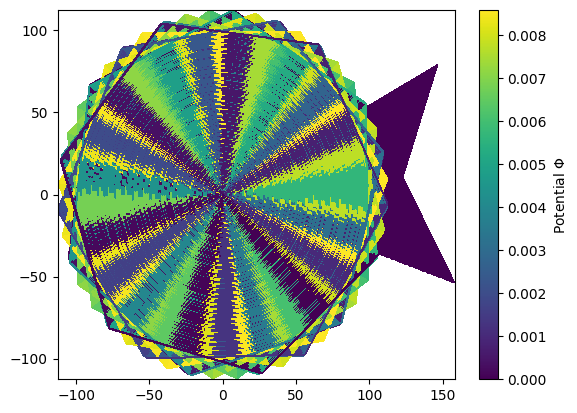

In [12]:
def convert_to_cartesian(r, theta):

	x = r * np.cos(theta);
	y = r * np.sin(theta);
	return x, y;

def fetch_data_from_h5(filepath):

	dataset = xr.open_dataset(filepath);
	dataset = dataset.rename(phony_dim_1 = "theta", phony_dim_2 = "r").load();

	# debug starts
	for object in dataset["theta"].values:
		print(object);
	# debug ends

	return dataset;

def generate_xy_grid(phi2D_dataset):
	
	r_coords, theta_coords = np.meshgrid(phi2D_dataset["r"], phi2D_dataset["theta"], indexing='ij')
	x = r_coords * np.cos(theta_coords)
	y = r_coords * np.sin(theta_coords)
	return x, y

def plot_phi2D(phi2D_dataset, x_coords, y_coords):

	phi2D = phi2D_dataset["Phirth_n0"].values;
	plt.pcolormesh(x_coords, y_coords, phi2D)
	plt.colorbar(label=r'Potential $\Phi$');
	plt.show()

dataset = fetch_data_from_h5("C:\\Workspace\\NSCC\\local copies\\h5 samples\\Phi2D_d00000.h5");
x, y = generate_xy_grid(dataset);
plot_phi2D(dataset, x, y);